# Data Visualization in Pandas - Cheat Sheet

All basic types of visualizations available in pandas and some advanced visualizations are also discussed.
This notebook could be seen a cheat sheet for Data Visualization in Pandas

We use Pandas for data manipulation in data analysis but it can also be utilised for data visualization even without importing matplotlib library as pandas itself use matplotlib in the backend.

## Line Plot

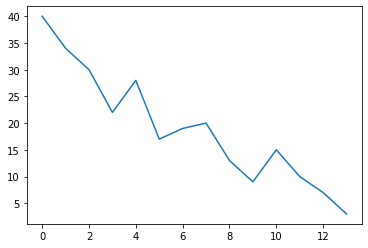

In [1]:
import pandas as pd
import numpy as np
a = pd.Series([40, 34, 30, 22, 28, 17, 19, 20, 13, 9, 15, 10, 7, 3])  
a.plot()

The above plot can be customized as below adding figure size, color, title and fontsize
There are a lot more styling technique we could use. These are some common ones.

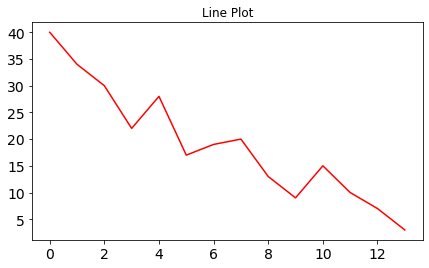

In [2]:
a.plot(figsize=(7, 4), color='red', title ='Line Plot', fontsize='14')

## Area Plot

We can .plot() method and pass a parameter 'kind' as area (a.plot(kind='area')) for area plot or we can use as below

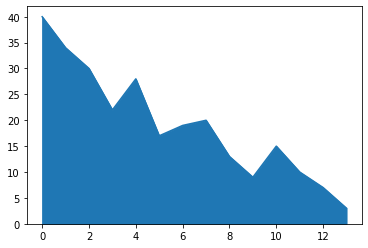

In [3]:
a.plot.area()

Let's add some more series to make more sense out of area plot. let's make a couple of series and make it a DataFrame
and use areplot on it.

In [4]:
b = pd.Series([45, 22, 12, 9, 20, 34, 28, 19, 26, 38, 41, 24, 14, 32])
c = pd.Series([25, 38, 33, 38, 23, 12, 30, 37, 34, 22, 16, 24, 12, 9])

d = pd.DataFrame({'a':a,'b':b,'c':c})      #DataFrame from a dict as data. Check the below link for DataFrame docs
d.head()                                   #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

,a,b,c
0,40,45,25
1,34,22,38
2,30,12,33
3,22,9,38
4,28,20,23


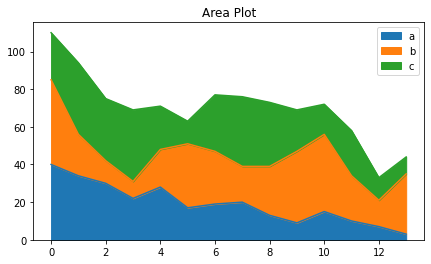

In [5]:
d.plot.area(figsize=(7,4), title='Area Plot')

More style can be added to the above area plot

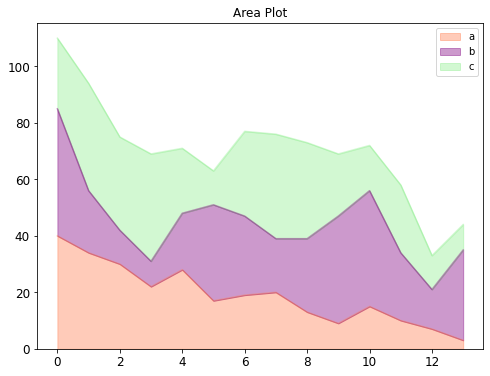

In [6]:
d.plot.area(alpha=0.4,color=['coral', 'purple', 'lightgreen'],figsize=(8, 6), title='Area Plot', fontsize=12)
# alpha is used to add translucent look to the area plot.

The .plot() can make 11 types of plots:
1.line
2.area
3.bar
4.barh
5.pie
6.box
7.hexbin
8.hist
9.kde
10.density
11.scatter

Let's input a dataset "nhanes_2015_2016.csv"

In [7]:
df = pd.read_csv('nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [8]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Histogram

BMXWT - Represents the weight of the population. Let us use this to plot a histogram.
We can also use df['BMXWT'].plot.hist() but gridlines will not be present

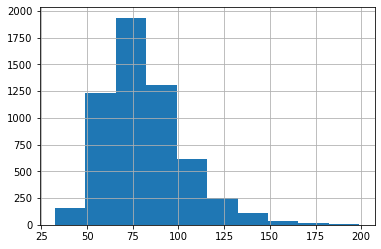

In [9]:
df['BMXWT'].hist()

To put several histograms together in a plot, we can use stacked parameter

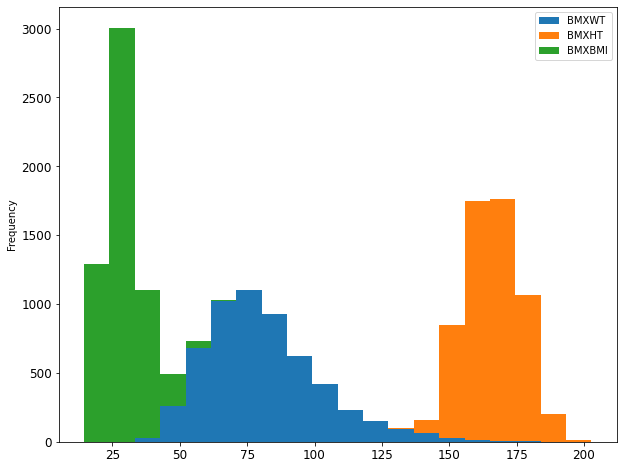

In [10]:
df[['BMXWT','BMXHT','BMXBMI']].plot.hist(stacked=True,bins=20, fontsize=12, figsize=(10, 8))
# Here always use .plot.hist and not just .hist

For having different histograms below line of code can be used. Remember not to include the fontsize parameter.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000BCF31EF70>,
      dtype=object)

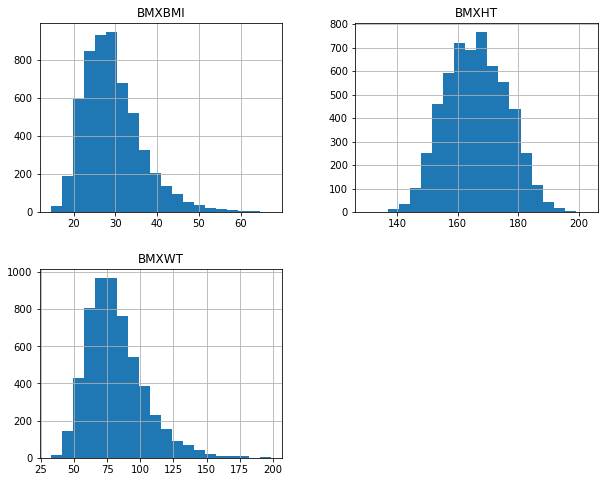

In [11]:
df[['BMXWT','BMXHT','BMXBMI']].hist(bins=20, figsize=(10, 8))

We have the systolic blood pressure data in the 'BPXSY1' column and the level of education in the 'DMDEDUC2' column
If we want to know the blood pressure distrubution based the education level, we can do it as follows.
Firstly, we modify the numerical values of 'DMDEDUC2' such that it is easily understandable.

In [12]:
df['DMDEDUC2x'] = df['DMDEDUC2'].replace({1: "less than 9", 2: "9-11", 3: "HS/GED", 4: "Pre college/AA", 
                                          5: "College", 7: "Refused", 9: "Don't know"})
df['DMDEDUC2x']

0              College
1               HS/GED
2               HS/GED
3              College
4       Pre college/AA
             ...      
5730            HS/GED
5731           College
5732    Pre college/AA
5733       less than 9
5734           College
Name: DMDEDUC2x, Length: 5735, dtype: object

Histograms of BPXSY1 by DMDEDUC2x

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000BCF983C70>,
      dtype=object)

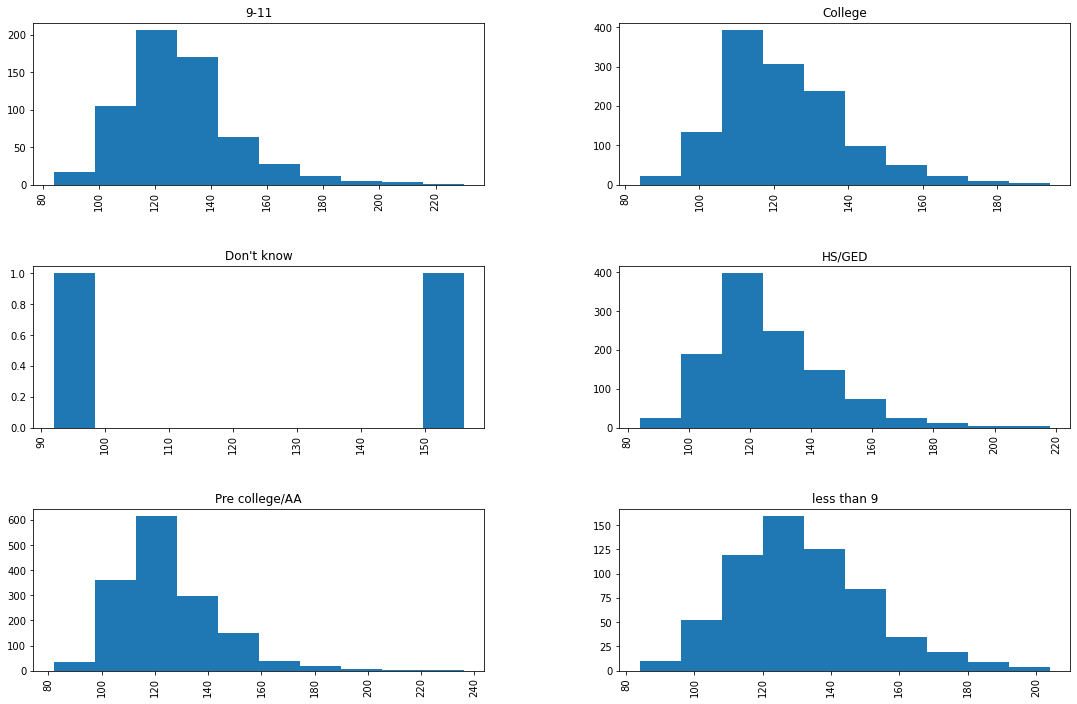

In [13]:
df[['BPXSY1','DMDEDUC2x']].hist(by='DMDEDUC2x',figsize=(18,12))

## Bar Plot

Now let's plot the blood pressure with respect to marital status ['DMDMARTL']. We need modify DMDMARTL as done before to make it more readable. 

In [14]:
df['DMDMARTLx'] = df['DMDMARTL'].replace({1: "Married", 2: "Widowed", 3: "Divorced", 
                                          4: "Separated", 5: "Never married", 6: "Living w/partner", 77: "Refused"})
df['DMDMARTLx']

0                Married
1               Divorced
2                Married
3       Living w/partner
4               Divorced
              ...       
5730             Widowed
5731             Married
5732             Widowed
5733             Married
5734       Never married
Name: DMDMARTLx, Length: 5735, dtype: object

To make the bar plot, we need to preprocess the data by grouping the data by marital status and taking the mean of blood pressure data of each group and then plot the bar graph.

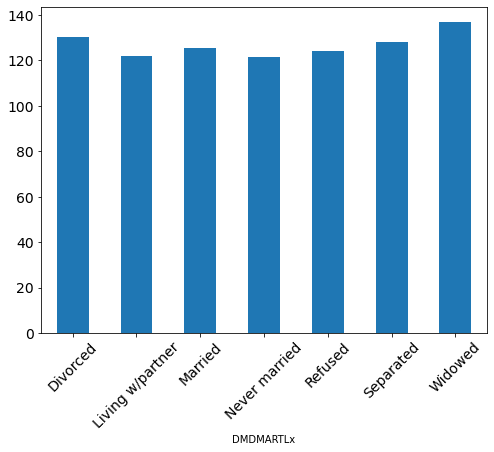

In [15]:
df.groupby('DMDMARTLx')['BPXSY1'].mean().plot(kind='bar', rot=45, fontsize=14, figsize=(8,6))
# rot parameter is used to rotate the x-axis labels to 45 degree to avoid congestion.

We can use kind='barh' for horizontal bar plot.

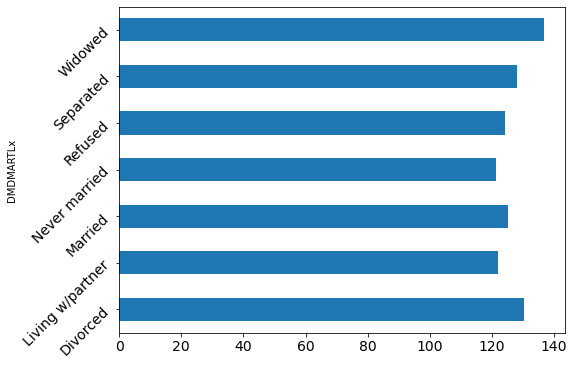

In [16]:
df.groupby('DMDMARTLx')['BPXSY1'].mean().plot(kind='barh', rot=45, fontsize=14, figsize=(8,6))

Now lets look for a bar plot with multiple variables. There is a column RIDRETH1 with ethinic origin of the population. Let us find out if there is any relationship between Weight, Height and Body Mass Index with the ethinic origin.
In order to achieve that we need to group these 3 columns (Weight, height, BMI) by origin and take mean

In [17]:
df_bmx = df.groupby('RIDRETH1')['BMXWT', 'BMXHT', 'BMXBMI'].mean().reset_index()
df_bmx

<ipython-input-17-dde9665c4191>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_bmx = df.groupby('RIDRETH1')['BMXWT', 'BMXHT', 'BMXBMI'].mean().reset_index()


,RIDRETH1,BMXWT,BMXHT,BMXBMI
0,1,81.400300,161.916650,30.965900
1,2,79.388338,162.695442,29.928150
2,3,83.703412,169.103730,29.199559
3,4,86.330687,168.457415,30.399751
4,5,71.365436,164.598322,26.152125


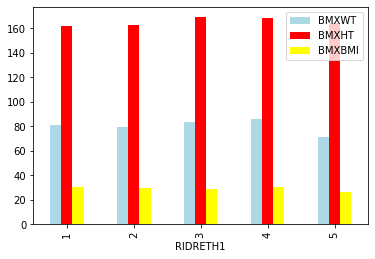

In [18]:
df_bmx.plot(x='RIDRETH1',
           y= ['BMXWT', 'BMXHT', 'BMXBMI'],
           kind = 'bar',
           color = ['lightblue', 'red', 'yellow'], 
            fontsize=10)

We can also stack the bar using the stacked parameter as shown below

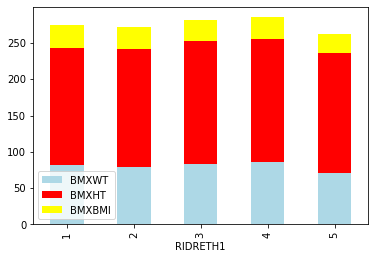

In [19]:
df_bmx.plot(x='RIDRETH1',
           y= ['BMXWT', 'BMXHT', 'BMXBMI'],
            stacked=True,
           kind = 'bar',
           color = ['lightblue', 'red', 'yellow'], 
            fontsize=10)

## Pie Plot

Checking if the marital status has any relation to the education. Here, the  marital status is grouped by education and count
the population in each marital status group by education level.

In [20]:
df_edu_marit = df.groupby('DMDEDUC2x')['DMDMARTL'].count()
pd.Series(df_edu_marit)

DMDEDUC2x
9-11               643
College           1366
Don't know           3
HS/GED            1186
Pre college/AA    1621
less than 9        655
Name: DMDMARTL, dtype: int64

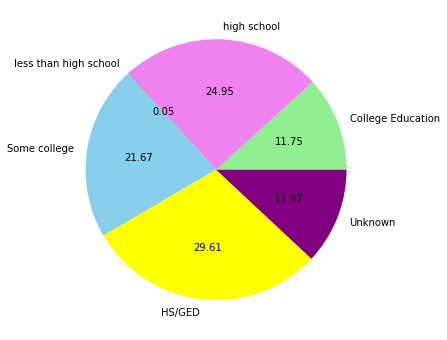

In [21]:
ax = pd.Series(df_edu_marit).plot.pie(subplots=True, label='',
     labels = ['College Education', 'high school', 
     'less than high school', 'Some college',
     'HS/GED', 'Unknown'],
     figsize = (8, 6),
     colors = ['lightgreen', 'violet', 'red', 'skyblue', 'yellow', 'purple'], autopct = '%.2f')

## Box Plot

Lets make a box plot using BMI (BMXBMI), Leg (BMXLEG) and arm length (BMXARML) data

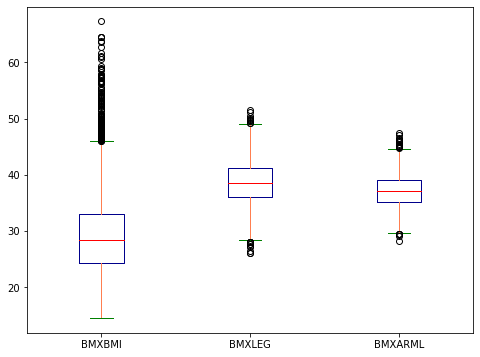

In [22]:
color = {'boxes': 'DarkBlue', 'whiskers': 'coral', 
         'medians': 'red', 'caps': 'Green'}
df[['BMXBMI', 'BMXLEG', 'BMXARML']].plot.box(figsize=(8, 6),color=color)

## Scatter Plot

A simple scatter plot between BMI and Blood Pressure will look like this

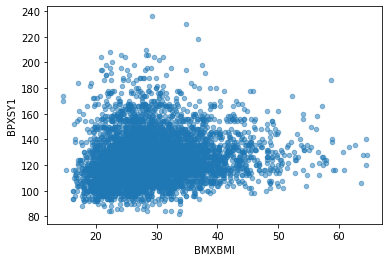

In [23]:
df.plot(kind='scatter',x='BMXBMI', y='BPXSY1',alpha=0.5)

Since the datset is too crowded, lets take the first 300 records to scatter plot and alpha parameter is used to create a translucent 
effect

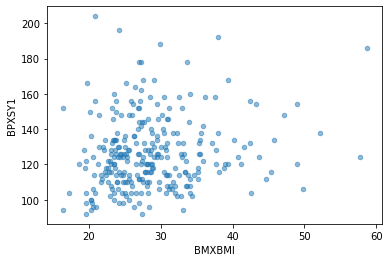

In [24]:
df.head(300).plot(kind='scatter',x='BMXBMI', y='BPXSY1',alpha=0.5)

There is an advanced method to scatter using shades as a third axis other than x and y axis. Lets use leg lenght as the shades. The length of the leg will be shown as shades. If the length is longer, the shades will be darker.

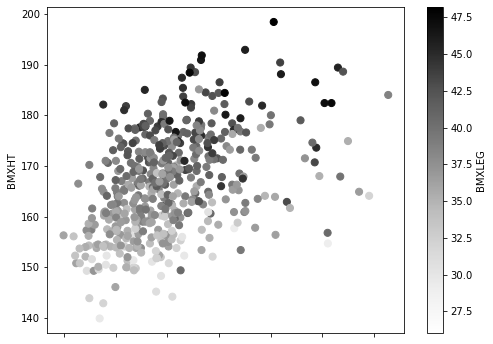

In [25]:
df.head(500).plot.scatter(x= 'BMXWT', y = 'BMXHT', c ='BMXLEG', s=50, figsize=(8, 6))
# the s parameter refers to the size of the data points

Another way of adding a parameter is by adding size in the particle. lets put height in x axis, weight in y axis and body mass index as the bubble size or particle size

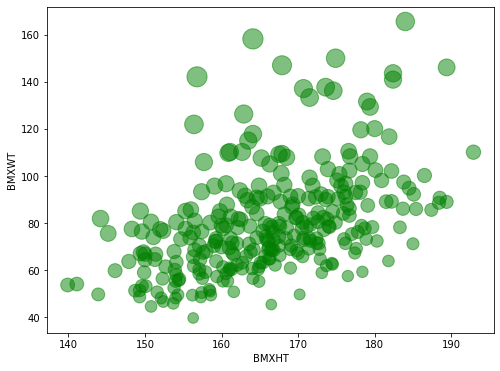

In [26]:
df.head(300).plot.scatter(x='BMXHT', y = 'BMXWT', 
                          s =df['BMXBMI'][:300] * 7, 
                          alpha=0.5, color='green',
                         figsize=(8, 6))

## Hexbin

Hexbin is a type of visualization where dots are hexagonal. In cases where the datset is too large, it is advisable to use spatial distribution. Each hexagon is a bin representing the density of that bin.

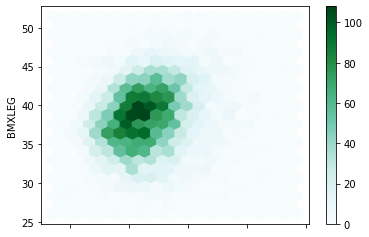

In [27]:
df.plot.hexbin(x='BMXARMC', y='BMXLEG', gridsize= 20)

Here, Darker color represents higher density of data and lighter color represents lower density of data. The concept is similar to that of a histogram.
But if we introduce a new parameter C, the distribution changes; it will not be like histogram anymore.

The parameter ‘C’ specifies the position of each (x, y) coordinate, accumulates for each hexagonal bins, and then reduced by using reduce_C_function. If the reduce_C_ function is not specified, by default it uses np.mean. You can specify it the way you want as np.mean, np.max, np.sum, np.std, etc.

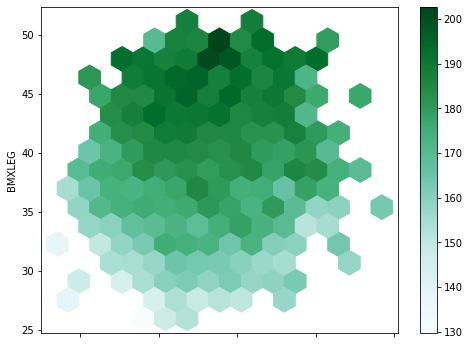

In [28]:
df.plot.hexbin(x='BMXARMC', y='BMXLEG', C = 'BMXHT',
                         reduce_C_function=np.max,
                         gridsize=15,
                        figsize=(8,6))

Here the darker color of a hexagon means, np.max has a higher value for the population height(‘BMXHT’) for that bin as you can see that I used np.max as a reduce_C_function. You can use a colormap instead of shades of color:

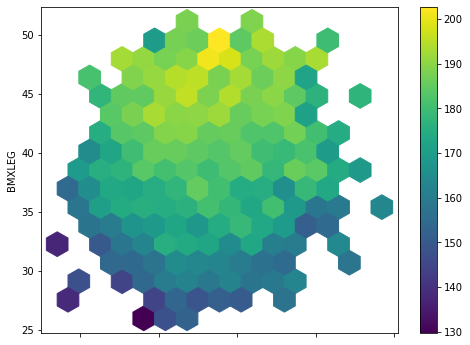

In [29]:
df.plot.hexbin(x='BMXARMC', y='BMXLEG', C = 'BMXHT',
                         reduce_C_function=np.max,
                         gridsize=15,
                        figsize=(8,6),
                        cmap = 'viridis')

# Advanced Pandas Visualizations

These all pandas visualizations are used everyday for Data analysis. Apart from these, there are some advanced visualizations as well that might come handy.

## Scatter_Matrix

Scatter_Matric provides huge information packed in one plot. It can be helpful in data analysis as well as feature engineering as a number of columns can plotted simultaneously to understand the relationship among themselves.

Here, lets use five features to plot Scatter_Matrix

We need to import scatter_matrix first from pandas.potting

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000BD18C82B0>,
      dtype=object)

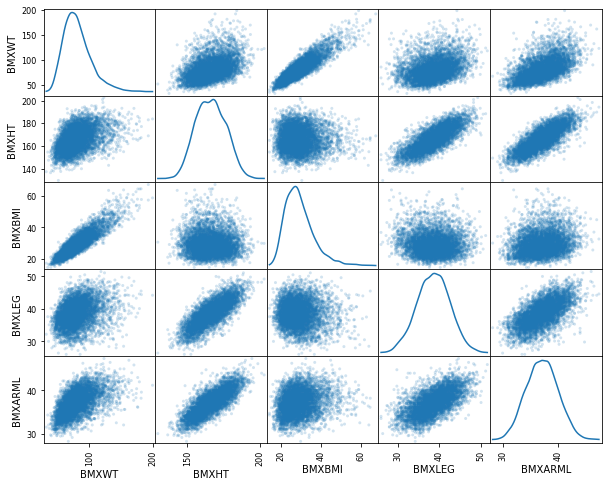

In [30]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML']], alpha = 0.2, figsize=(10, 8), diagonal = 'kde')

This gives the relationship between all five variables with each other. In the diagonals, it gives you the density plot of each individual feature.

## KDE or Kernel Density Plots

Kernel Density Plots are built to provide the probability distribution of a series or a column in a DataFrame. Let’s see the probability distribution of the weight variable (‘BMXWT’).

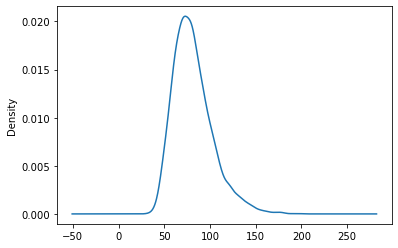

In [31]:
df['BMXWT'].plot.kde()

We can visualize several columns in one plot as well

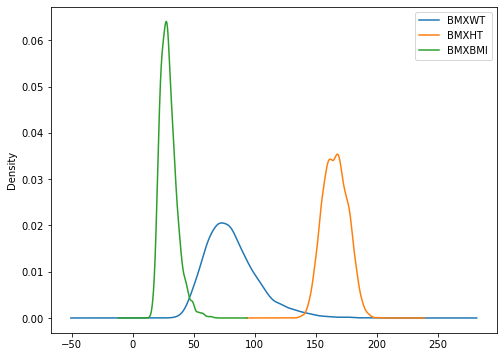

In [32]:
df[['BMXWT', 'BMXHT', 'BMXBMI']].plot.kde(figsize = (8, 6))

## Parallel_Coordinates

This is a good way of showing multi-dimensional data. It clearly shows the clusters if there is any. For example, I want to see if there is any difference in height, weight, and BMI between men and women. Let's check.

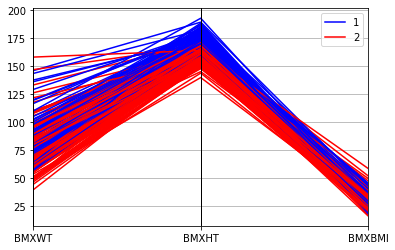

In [33]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(df[['BMXWT', 'BMXHT', 'BMXBMI', 'RIAGENDR']].dropna().head(200), 'RIAGENDR', color=['blue', 'red'])

Here, 1 is men and 2 is women. As you can see, there is clear in body weight, height, and BMI between men and women. 

## Bootstrap_Plot

This a very important plot for research and statistical analysis. It will save a lot of time in statistical analysis. The bootstrap plot is used to assess the uncertainty of a given dataset.

This function takes a random sample of a specified size. Then mean, median, and midrange is calculated for that sample. This process is repeated a specified number of times.

Here Lets create a bootstrap plot using the BMI data:

D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


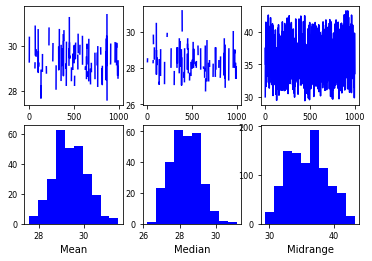

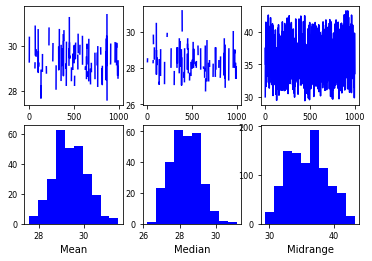

In [34]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(df['BMXBMI'], size=100, samples=1000, color='blue')

Here, the sample size is 100 and the number of samples is 1000. So, it took a random sample of 100 data to calculate mean, median, and midrange. The process is repeated 1000 times.

Here, almost all important everyday visualisations in pandas has been covered. Apart from using matplotlib and seaborn, the pandas could make the codes simpler.